 # TP6: Apprentissage profond(Deep learning)
 ## TP6.1 Le perceptron : Régression linéaire  
 Dans ce TP, nous explorerons le fonctionnement interne des neurones/unités et des couches.
L'objecif est double, tout d'abord se familiariser avec les bibliothèques (librairies) tensorflow et keras, puis comparer différentes architectures de réseaux de nruones.


## Librairies (Bibliothèques)
**Tensorflow et Keras**  
Tensorflow est un logiciel d'apprentissage automatique développé par Google. En 2019, Google a intégré Keras dans Tensorflow et a publié Tensorflow 2.0. Keras est un framework développé indépendamment par François Chollet qui crée une interface simple et centrée sur les couches de Tensorflow. Ce cours utilisera l'interface Keras.


#### Travail demandé :
Objectif  comparer les performances
- d'un réseau de neurones simple (un Perceptrion, 1 seul neurone de sortie)
- et un réseau plus dense avec une couche cachée et une couche de sortie composée d'un seul neurone.

De même nous travaillerons sur deux datasets. Les deux datasets portent sur le housing. On vous propose deux Datasets : 1 (small) à 4 variables et 100 exemples et le second à 13 variables et quelques centaines d'exemples.
<span style="color:green">  L'architecture du réseau à un réel impact sur les résultats </span>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf


#from tensorflow.keras import datasets
#from tensorflow.keras.layers import Dense, Input
#from tensorflow.keras import Sequential
#from tensorflow.keras.losses import MeanSquaredError
#from tensorflow.keras.activations import sigmoid
#from tensorflow.keras.metrics import Accuracy

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split


In [7]:
#fonction utile pour calculer le R2 score
from keras import backend as K

def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Neurone sans activation - Régression linéaire

### 1. Sélection des données
On utilisera les données houses.
On comence tout d'abord par le petit  (Samll) Dataset puis on regait le process en prenant le Large dataset.

#### Small dataset

In [8]:
# lecture du fichier texte.
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/houses.txt", header=None)
data = data.rename(columns={0: 'Surf', 1: 'Nbpieces', 2: 'nbEtage', 3: 'Age', 4:'Prix'})
X= data.drop('Prix',  axis=1)
y=data['Prix']
data.head(3)


Surf  Nbpieces  nbEtage   Age   Prix
0   952.0       2.0      1.0  65.0  271.5
1  1244.0       3.0      1.0  64.0  300.0
2  1947.0       3.0      2.0  17.0  509.8

## 2 Préparation des données

#### Split des données

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### 2.1  Normalisation des données
Rappel : Il est primordial de normaliser les données. Vous pourrez vérifier les performances de vos modèles avec et sans données normalisées
- Deux options : on utilise soit, notre propre normalisation ou une normalisation proposée dans sklearn.

#### Option 1

In [10]:
## On peut utiliser une simple normalisation (X - moyenne)/ecart type)
# C'est une standardisation la même que StandardScaler de scikit learn

mean = X_train.mean()
std  = X_train.std()
X_train = (X_train - mean) / std

# Normalisation des données de test
X_test  = (X_test  - mean) / std

#display(X_train.describe().style.format("{0:.2f}").set_caption("After normalization :"))
display(X_train.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))

#### Option 2:
Une autre façon de normaliser ( utilisation d'un encoder fourni par sklearn)

In [11]:
### Option 2 :  Attention Une seule normalisation
encoder=RobustScaler()
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


### 3. Construction (définition) du modèle
On construite un modèle de régression linéaire. La fonction mise en œuvre par un neurone sans activation est la même que la régression linéaire du chapire 2.:
<figure>
    <img src="../../images/perceptron.png"  style="width:440px;height:200px;" >
</figure>

$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$

La définition d'un modèle exige le choix d'un certains nombre d'options (fonctions):  
- [Optimizer:](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers ) C'est l'algorithme d'apprentissage utilisé pour trouver les bons paramètres
- [Activation:](https://www.tensorflow.org/api_docs/python/tf/keras/activations): `sigmoid`, `linear`, `relu`, ...
- [Loss :](https://www.tensorflow.org/api_docs/python/tf/keras/losses) fonctions d'erreurs, `mse`, `BinaryCrossentropy`, `CategoricalCrossentropy`, ...
- [Metrics :](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) `Accuracy`, `F1Score`,`mae`, `mse`...
    



### 3.1 Un réseau de neurone à 1 neurone.

Deux façons de définir le réseau (en fait il existe trois façons, la troisième, le mode fonctionnel, est discuté dans le TP 6.4)

In [12]:
# Option 1
m = X_train.shape[1]
model = tf.keras.Sequential ([
    tf.keras.layers.Input(m, name="InputLayer"),
    tf.keras.layers.Dense(units=1, activation = 'linear',name='output')
])

# Option 2 : Une autre façon de construire un réseau
##m = X_train.shape[1]
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Input(m, name="InputLayer"))
#model.add(tf.keras.layers.Dense(units=1, activation = 'linear',name='output'))


In [13]:
#Compiler le modèle
model.compile(optimizer='adam',
              loss= 'mse',
              metrics=['mae', 'mse',r2_score])

# Affichage de l'archo-itecture di-u modèle
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output (Dense)              (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Questions ;
- Combien de paramètres possède ce modèle. Justifier votre réponse, indiquer à quoi ils correspodent exactement ?

#### Nombre de paramètres : répondre ici
-


#### On peut visualiser les paramètres du réseau

In [14]:
W1, b1 = model.get_layer("output").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)


W1(4, 1):
 [[ 0.05778039]
 [ 0.5534624 ]
 [-0.39303207]
 [-0.40289217]] 
b1(1,): [0.]


### 4. Entrainement du modèle (Model training)

In [15]:
# Entrainement du modele
history  = model.fit(X_train,
                     y_train,
                     epochs=100,
                     batch_size= 10,
                     verbose=False,
                     validation_data = (X_test, y_test))
#model.metrics_names

#### Visualiser les patramètres appris

In [16]:
model.get_weights()

[array([[0.50538546],
        [0.04950549],
        [0.24975339],
        [0.18576755]], dtype=float32),
 array([0.69729096], dtype=float32)]

### 5. Evaluation des performances du modèle
Les scores (métrqiues) de performances sont définis dans le paramètres `metrics` du modèle.


In [17]:
score = model.evaluate(X_test, y_test, verbose=0)
print('x_test / loss      : {:5.4f}'.format(score[0]))
print('x_test / mae       : {:5.4f}'.format(score[1]))
print('x_test / mse       : {:5.4f}'.format(score[2]))
print('x_test / r2_score  : {:5.4f}'.format(score[3]))


x_test / loss      : 145343.0625
x_test / mae       : 363.0814
x_test / mse       : 145343.0625
x_test / r2_score  : -9.6878


### Historique du training (training history)
On peut afficher l'historique de l'apprentissge.
`history` est un dictionnaire, on peut afficher ses paramètres mais surtout tous les scores de performanes  du modèle sur le traning et le validation data.  `history.history.keys()` renvoie les clés des données sauvegardées.

In [18]:
print(history.params)
print(history.history.keys())
#print(history.history['loss'])

{'verbose': False, 'epochs': 100, 'steps': 7}
dict_keys(['loss', 'mae', 'mse', 'r2_score', 'val_loss', 'val_mae', 'val_mse', 'val_r2_score'])


In [19]:
import pandas as pd
df=pd.DataFrame(data=history.history)
display(df)

loss         mae            mse   r2_score       val_loss  \
0   140567.875000  361.896637  140567.875000 -15.386218  146434.671875   
1   140558.421875  361.883789  140558.421875 -25.335981  146423.718750   
2   140549.109375  361.870880  140549.109375 -20.318583  146412.843750   
3   140539.921875  361.858093  140539.921875 -16.560144  146401.750000   
4   140530.296875  361.845215  140530.296875 -17.392393  146390.859375   
..            ...         ...            ...        ...            ...   
95  139676.875000  360.668762  139676.875000 -20.029036  145387.171875   
96  139667.656250  360.656067  139667.656250 -15.678782  145376.031250   
97  139658.171875  360.643097  139658.187500 -16.723410  145365.062500   
98  139648.781250  360.630188  139648.781250 -17.308481  145354.171875   
99  139639.703125  360.617523  139639.703125 -16.047228  145343.062500   

       val_mae        val_mse  val_r2_score  
0   364.553894  146434.671875     -9.961812  
1   364.539215  146423.718750     -9.961003  
2   364.524567  146412.843750     -9.960198  
3   364.509827  146401.750000     -9.959378  
4   364.495117  146390.859375     -9.958572  
..         ...            ...           ...  
95  363.140747  145387.171875     -9.884415  
96  363.125824  145376.031250     -9.883592  
97  363.111053  145365.062500     -9.882782  
98  363.096313  145354.171875     -9.881977  
99  363.081390  145343.062500     -9.881157  

[100 rows x 8 columns]

Text(0.5, 1.0, 'R2 score ')

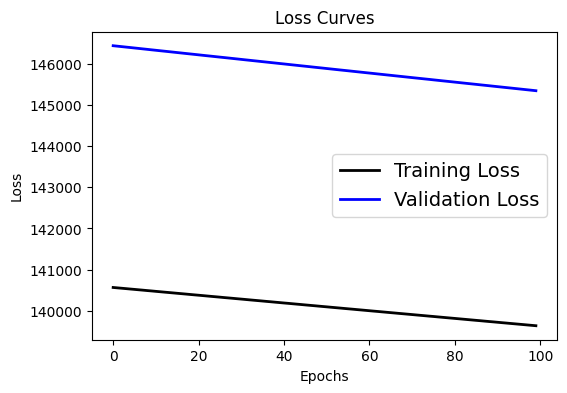

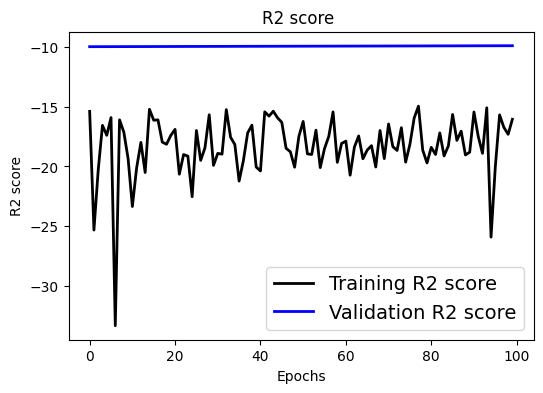

In [20]:
import matplotlib.pyplot as plt

# Plotting the loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Plotting the r2_score curve
plt.figure(figsize=[6,4])
plt.plot(history.history['r2_score'], 'black', linewidth=2.0)
plt.plot(history.history['val_r2_score'], 'blue', linewidth=2.0)
plt.legend(['Training R2 score', 'Validation R2 score'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('R2 score', fontsize=10)
plt.title('R2 score ', fontsize=12)


### Sauvegarder l'historique (Save History and model)

In [21]:
#Saving:

np.save('my_history_sd_1n.npy',history.history)
#np.save('my_history_sd_MLP.npy',history.history)
#np.save('my_history_Ld_1n.npy',history.history)
#np.save('my_history_Ld_MLP.npy',history.history)

In [22]:
#Loading:
history=np.load('my_history.sd_1n.npy',allow_pickle='TRUE').item()


FileNotFoundError: ignored

### 6. Faire des prédictions

In [23]:
#Small Sata set
my_data = [ 0.126918, 0.417687, 1.374513, -0.502325 ]
real_price = 350.00
my_data=np.array(my_data).reshape(1,4)

#my_data = [ 1.26425925, -0.48522739,  1.0436489 , -0.23112788,  1.37120745,
#       -2.14308942,  1.13489104, -1.06802005,  1.71189006,  1.57042287,
#        0.77859951,  0.14769795,  2.7585581 ]
#real_price = 10.40
#my_data=np.array(my_data).reshape(1,13)

In [24]:
predictions = model.predict( my_data )
print("Prediction : {:.2f} K$".format(predictions[0][0]))
print("Reality    : {:.2f} K$".format(real_price))


1/1 [==============================] - 0s 90ms/step
Prediction : 1.03 K$
Reality    : 350.00 K$


#### Question :
Au regard des performances  et du résultat de prédiction du modèle, quelle est votre conclusion (avis) sur les performances de ce modèle.